In [9]:
#imports

import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt


import numpy as np 
import pandas as pd
from scipy.stats import randint
import scipy 
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns 
from pandas import set_option
plt.style.use('ggplot') 

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model


#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV  
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Import data 

In [13]:
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [19]:
credit.groupby('default payment next month')['default payment next month'].count()

default payment next month
0    23364
1     6636
Name: default payment next month, dtype: int64

## Feature Engineering 

In [15]:
credit = rawData

In [6]:
#Rename column
credit.rename(columns={"default payment next month": "Default"}, inplace=True)
# drop column "ID"
credit.drop('ID', axis = 1, inplace =True) 
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [17]:
corrMat = credit.corr()
print(corrMat)

                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.02

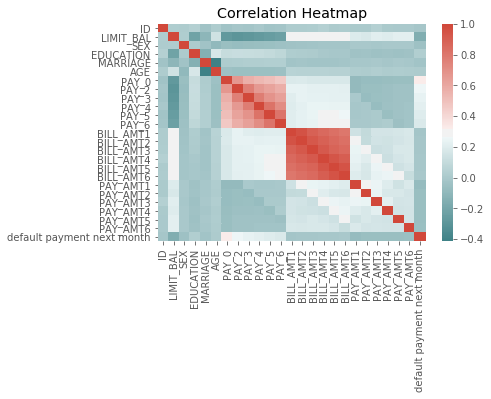

In [18]:
# Create Heat Map
# corr_credit = df_credit.corr()
# print(corr_credit.head(1))
# corr_credit.to_csv('corr.csv')

#print correlation map
cmap = sns.diverging_palette(200, 15, as_cmap=True)
sns.heatmap(corrMat,
            xticklabels=corrMat.columns.values,
            yticklabels=corrMat.columns.values,
            cmap=cmap)
plt.plot()
plt.title('Correlation Heatmap')
plt.show()

In [7]:
credit['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [8]:
credit['EDUCATION']=np.where(credit['EDUCATION'] == 5, 4, credit['EDUCATION'])
credit['EDUCATION']=np.where(credit['EDUCATION'] == 6, 4, credit['EDUCATION'])
credit['EDUCATION']=np.where(credit['EDUCATION'] == 0, 4, credit['EDUCATION'])

In [9]:
credit['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

In [10]:
credit['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [11]:
credit['MARRIAGE']=np.where(credit['MARRIAGE'] == 0, 3, credit['MARRIAGE'])
credit['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

### Separate feature from dependent variable

In [12]:
y = credit['Default']     # Dependent variable default=1 or non-default=0
features = credit.drop('Default', axis = 1, inplace = False)

# Machine Learning: Classification models

### Spliting the data into train and test sets

In [13]:
# Original dataset
X = credit.drop('Default', axis = 1, inplace = False)
y = credit['Default']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=42)

In [14]:
stdX = (features - features.mean()) / (features.std())              # standardization
data_st = pd.concat([y,stdX.iloc[:,:]],axis=1)
data_st = pd.melt(data_st,id_vars="Default",
                    var_name="features",
                    value_name='value')

In [15]:
#Training Set (y Training)
X_train_count = len(X_train.index)
print('The number of observations in the Y training set are:',str(X_train_count))
X_train.head()

The number of observations in the Y training set are: 22500


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
27350,200000,1,1,2,32,-1,-1,-1,-2,-2,...,0,0,0,0,2182,0,0,0,0,0
22029,320000,2,1,2,28,0,0,0,0,0,...,290057,25922,22982,20553,13300,12756,1295,10312,8394,8242
22166,170000,2,1,2,27,-1,-1,2,-1,-1,...,736,736,736,736,1536,0,736,736,736,736
1880,90000,2,3,1,40,0,0,0,0,0,...,76947,46589,47730,49488,3416,4142,1700,1888,2710,1500
1319,250000,2,1,1,43,-1,-1,-1,0,0,...,45297,17371,11481,5922,24890,48394,0,5461,15000,6000


In [16]:
#Dependent Variable Training Set (y Training)
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 22500


27350    1
22029    0
22166    0
1880     0
1319     0
Name: Default, dtype: int64

In [17]:
#Testing Set (X Testing)
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 7500
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
16895      50000    1          2         1   45      1      2      0      0   
6382       80000    2          2         1   30      1      2      0      0   
14305     160000    1          3         1   42      1     -1     -1     -2   
15699      20000    1          2         1   31      1      4      3      2   
18485     130000    2          2         2   26      0      0      0      2   

       PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
16895      0  ...      49140      49451      20921      20058         0   
6382       0  ...      81380      75374      77158      78710         0   
14305     -1  ...       -436       -436        436        436      1564   
15699      0  ...      20442      19773      20238      18062         0   
18485      2  ...     132517     133747     134230     131986      6000   

       PAY_

In [18]:
#Ground Truth (y_test) 
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 7500


16895    1
6382     0
14305    0
15699    0
18485    0
Name: Default, dtype: int64

In [19]:
X_train.shape, X_test.shape

((22500, 23), (7500, 23))

In [20]:
# Dataset with standardized features
Xstd_train, Xstd_test, ystd_train, ystd_test = train_test_split(stdX,y, test_size=0.25, stratify=y, random_state=42)

## Correlation 

# Feature Selection

### RFE

In [21]:
NUM_FEATURES = 5
model = LogisticRegression()
rfe_stand = RFE(model, NUM_FEATURES)
fit_stand = rfe_stand.fit(stdX, y)
print("St Model Num Features:", fit_stand.n_features_)
#print("St Model Selected Features:", fit_stand.support_)
print("Std Model Feature Ranking:", fit_stand.ranking_)
# calculate the score for the selected features
score_stand = rfe_stand.score(stdX,y)
print("Standardized Model Score with selected features is: %f (%f)" % (score_stand.mean(), score_stand.std()))

St Model Num Features: 5
Std Model Feature Ranking: [ 6 13  7  5  8  1  4  2 16 12 19  1  3  1 18 10 17  1  1 11  9 14 15]
Standardized Model Score with selected features is: 0.812467 (0.000000)


In [22]:
feature_names = np.array(features.columns)
print('Most important features (RFE): %s'% feature_names[rfe_stand.support_])

Most important features (RFE): ['PAY_0' 'BILL_AMT1' 'BILL_AMT3' 'PAY_AMT1' 'PAY_AMT2']


In [23]:
# Dataset with five most important features
Ximp = stdX[['PAY_0', 'BILL_AMT1', 'BILL_AMT3','PAY_AMT1','PAY_AMT2']]
X_tr, X_t, y_tr, y_t = train_test_split(Ximp,y, test_size=0.25, stratify=y, random_state=42)

# Building the Models and Choosing the Right Model

###### Logistic Regression (original data) 

In [26]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

C:\Users\CarlosBarth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 0.7788


C:\Users\CarlosBarth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\CarlosBarth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#


              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5841
           1       0.00      0.00      0.00      1659

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.61      0.78      0.68      7500


Average 5-Fold CV Score: 0.7788 , Standard deviation: 0.0001


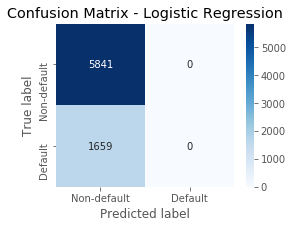

In [27]:
LR = LogisticRegression(C=0.00005, random_state=0)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(LR, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,LR.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

###### Logistic Regression (standardized features) 

In [28]:
# Instantiate the RandomizedSearchCV object:
logreg_cv_std = RandomizedSearchCV(logreg,param_grid , cv=5, random_state=0)

# Fit it to the standardized data
logreg_cv_std.fit(Xstd_train, ystd_train)

# Print the tuned parameters 
print("Tuned Logistic Regression Parameters with standardized features: {}".format(logreg_cv_std.best_params_))

Tuned Logistic Regression Parameters with standardized features: {'C': 0.05179474679231213}


Accuracy: 0.8094666666666667

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5841
           1       0.70      0.24      0.36      1659

    accuracy                           0.81      7500
   macro avg       0.76      0.61      0.62      7500
weighted avg       0.79      0.81      0.77      7500


Average 5-Fold CV Score: 0.8098 , Standard deviation: 0.0046


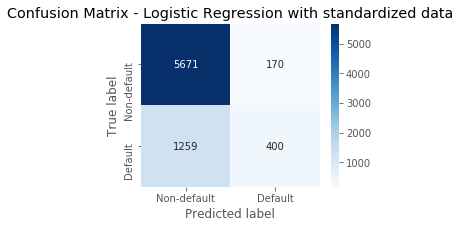

In [29]:
#modeling using Tuned Logistic Regression Parameter
LRS = LogisticRegression(C=3.73, random_state=0)
LRS.fit(Xstd_train, ystd_train)
y_pred = LRS.predict(Xstd_test)
print('Accuracy:', metrics.accuracy_score(y_pred,ystd_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(LRS, stdX, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(ystd_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(ystd_test,LRS.predict(Xstd_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression with standardized data");

###### Logistic Regression (with most important features)

Accuracy: 0.8138666666666666

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5841
           1       0.70      0.27      0.39      1659

    accuracy                           0.81      7500
   macro avg       0.76      0.62      0.64      7500
weighted avg       0.80      0.81      0.78      7500


Average 5-Fold CV Score: 0.812 , Standard deviation: 0.0062


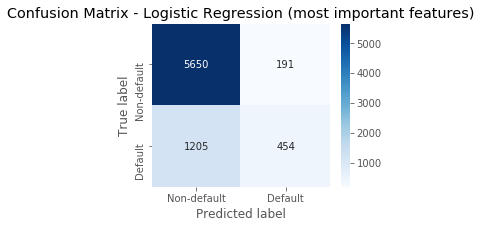

In [30]:
LR_imp = LogisticRegression(C=3.73, random_state=0)
LR_imp.fit(X_tr, y_tr)
y_pred = LR_imp.predict(X_t)
print('Accuracy:', metrics.accuracy_score(y_pred,y_t))

## 5-fold cross-validation 
cv_scores =cross_val_score(LR_imp, Ximp, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_t, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_t,LR_imp.predict(X_t))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression (most important features)");

### Decision Tree Classifier

In [31]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf": [1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_distributions=param_dist, cv=5, random_state=0)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 6, 'max_features': 5, 'max_depth': 5, 'criterion': 'entropy'}


Accuracy: 0.8113333333333334

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5841
           1       0.66      0.31      0.42      1659

    accuracy                           0.81      7500
   macro avg       0.74      0.63      0.65      7500
weighted avg       0.79      0.81      0.78      7500


Average 5-Fold CV Score: 0.8136 , Standard deviation: 0.0058


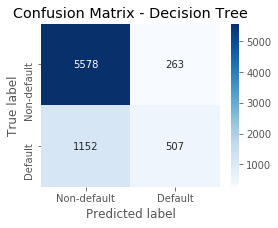

In [33]:


Tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 4, 
                                     max_features= 7, min_samples_leaf= 8, 
                                     random_state=0)
Tree.fit(X_train, y_train)
y_pred = Tree.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(Tree, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)), 
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Tree.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Decision Tree");

### Random Forest Classifier

In [34]:
#RF finding tuning parameters
# Create the random grid
param_dist = {'n_estimators': [50,100,150,200,250],
               "max_features": [1,2,3,4,5,6,7,8,9],
               'max_depth': [1,2,3,4,5,6,7,8,9],
               "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, 
                           cv = 5, random_state=0, n_jobs = -1)

rf_cv.fit(X, y)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

Tuned Random Forest Parameters: {'n_estimators': 150, 'max_features': 5, 'max_depth': 5, 'criterion': 'gini'}


Accuracy: 0.8174666666666667

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5841
           1       0.66      0.35      0.46      1659

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500


Average 5-Fold CV Score: 0.8203 , Standard deviation: 0.0093


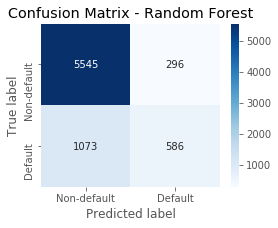

In [35]:


RFC = RandomForestClassifier(criterion= 'gini', max_depth= 6, 
                                     max_features= 5, n_estimators= 150, 
                                     random_state=0)
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(RFC, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,RFC.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest");



# Comparison of model performance

### Receiver operating characteristic (ROC) Curve

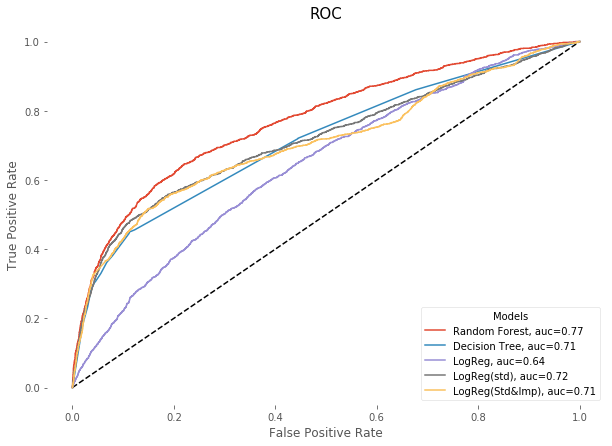

In [36]:
y_pred_proba_RF = RFC.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_RF)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_RF)

y_pred_proba_DT = Tree.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba_DT)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_DT)

y_pred_proba_LR = LR.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba_LR)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba_LR)

y_pred_proba_LRS = LRS.predict_proba(Xstd_test)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(ystd_test,  y_pred_proba_LRS)
auc4 = metrics.roc_auc_score(ystd_test, y_pred_proba_LRS)

y_pred_proba_LRimp = LR_imp.predict_proba(X_t)[::,1]
fpr5, tpr5, _ = metrics.roc_curve(y_t,  y_pred_proba_LRimp)
auc5 = metrics.roc_auc_score(y_t, y_pred_proba_LRimp)

#Plotting the results
plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Random Forest, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Decision Tree, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="LogReg, auc="+str(round(auc3,2)))
plt.plot(fpr4,tpr4,label="LogReg(std), auc="+str(round(auc4,2)))
plt.plot(fpr5,tpr5,label="LogReg(Std&Imp), auc="+str(round(auc5,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

### Mean Accuracy (cross-validation)

In [37]:
# Append different models
models = []

# Logistic Regression
models.append(('LogReg',
               LogisticRegression(C=3.73, random_state=0),'none'))

# Logistic Regression (with standardized data)
models.append(('LogReg(Std)',
               LogisticRegression(C=3.73, random_state=0),'Std'))

# Logistic Regression with standardized and important features
models.append(('LogReg(Std&Imp)',
               LogisticRegression(C=3.73, random_state=0),'imp'))

# Decision Tree
models.append(('Decision Tree', 
              DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, 
                                     max_features= 7, min_samples_leaf= 8, 
                                     random_state=0),'none'))

# Random Forest Classifier
models.append(('Random Forest', 
              RandomForestClassifier(criterion= 'gini', max_depth= 6, 
                                     max_features= 5, n_estimators= 150, 
                                     random_state=0), 'none'))

# Evaluate each model
results = []
names = []
scoring = 'accuracy'

for name, model, Std in models:
    if Std == 'Std':
        cv_results = cross_val_score(model, stdX, y, cv=5, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)       
    elif Std == 'none':
        cv_results = cross_val_score(model, X, y, cv=5, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    else:
        cv_results = cross_val_score(model, Ximp, y, cv=5, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

C:\Users\CarlosBarth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\CarlosBarth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

LogReg: 0.778733 (0.000133)
LogReg(Std): 0.809800 (0.004601)
LogReg(Std&Imp): 0.812000 (0.006248)
Decision Tree: 0.815933 (0.006852)
Random Forest: 0.820300 (0.009255)


### Model Accuracy comparision 

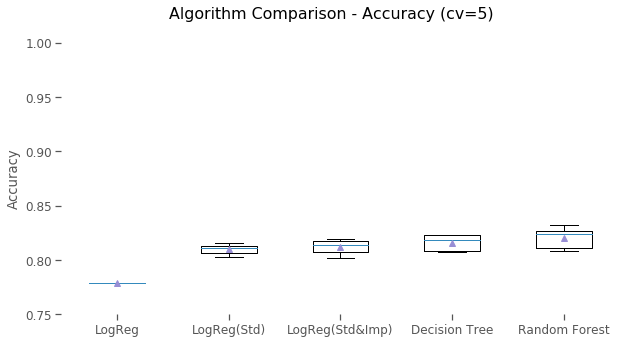

In [38]:
from matplotlib import pyplot
# Plot all the accuracy results vs. each model 
#(model type on the x-axis and accuracy on the y-axis).
fig = pyplot.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1.1)
fig.suptitle('Algorithm Comparison - Accuracy (cv=5)')
ax = fig.add_subplot(111)
pyplot.boxplot(results, showmeans=True)
ax.set_xticklabels(names)
ax.set_ylabel('Accuracy')
ax.set_ylim([0.75,1])
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

### Model comparison 

In [39]:
from astropy.table import Table, Column
data_rows = [('Logistic Regression', 'Standardized', 0.79, 0.81, 0.77),
              ('Logistic Regression', 'Important features', 0.79, 0.81, 0.78),
              ('Decision Tree', 'original', 0.80, 0.82, 0.79),
             ('Random Forest', 'original', 0.80, 0.82, 0.80)
            ]
t = Table(rows=data_rows, names=('Model', 'Data', 'Precision', 'Recall', 'F1'))
print(t)

       Model               Data        Precision Recall  F1 
------------------- ------------------ --------- ------ ----
Logistic Regression       Standardized      0.79   0.81 0.77
Logistic Regression Important features      0.79   0.81 0.78
      Decision Tree           original       0.8   0.82 0.79
      Random Forest           original       0.8   0.82  0.8
